In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import listdir
import os
import sys
sys.path.insert(0, os.path.abspath('..')) # Note that this line is useless with a regular pip installation of PyWST.
import pywst as pw
%matplotlib inline

In [2]:
plt_dir ='/Users/ianhothi/Dropbox/WST_RWST/Figures/lightcone_test/'
ddir = '/Users/ianhothi/WST/Testing/pywst/examples/data/'

In [3]:
lc = fits.getdata(ddir+'fx_0.1_RHS=0.5_fa_0.5_x_lightcone_dtb_fullres.fits')

In [4]:
M, N = 256,256 # Height and width of the test maps
J = 8 # We choose to probe 7 scales
L = 8 # Number of angles in which the interval [0,pi] is divided
OS = 0 # No oversampling

In [5]:
wst_op = pw.WSTOp(M, N, J, L, OS)

In [6]:
d = wst_op.apply(lc[0])

/Users/ianhothi/anaconda3/envs/pywst/lib/python3.7/site-packages/pywst/wst_operator.py:167: UserWarning: Warning! Swapping byte order of input data to avoid FFT error.
  warnings.warn("Warning! Swapping byte order of input data to avoid FFT error.")


In [7]:
coeffs_0, index = d.get_coeffs(layer=1, j1=0)
coeffs_1, index = d.get_coeffs(layer=1, j1=1)
coeffs_2, index = d.get_coeffs(layer=1, j1=2)
coeffs_3, index = d.get_coeffs(layer=1, j1=3)
coeffs_4, index = d.get_coeffs(layer=1, j1=4)
coeffs_5, index = d.get_coeffs(layer=1, j1=5)
coeffs_6, index = d.get_coeffs(layer=1, j1=6)
coeffs_7, index = d.get_coeffs(layer=1, j1=7)










In [8]:
coeffs_full = np.zeros((8,8))

In [9]:
coeffs_full[0,:] = coeffs_0
coeffs_full[1,:] = coeffs_1
coeffs_full[2,:] = coeffs_2
coeffs_full[3,:] = coeffs_3
coeffs_full[4,:] = coeffs_4
coeffs_full[5,:] = coeffs_5
coeffs_full[6,:] = coeffs_6
coeffs_full[7,:] = coeffs_7
















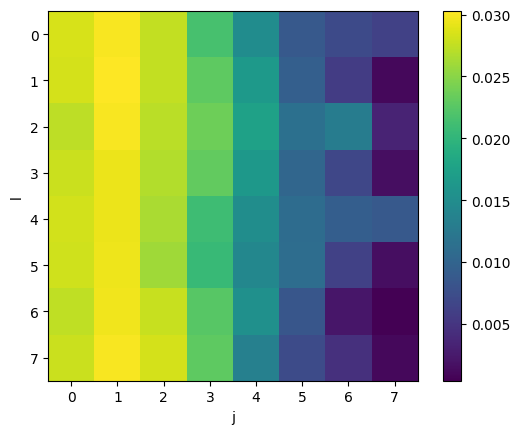

In [10]:
plt.imshow(coeffs_full.T)
plt.ylabel('l')
plt.xlabel('j')
plt.colorbar()

In [11]:
def WST_Map(wst_object,plot = True):
    J = wst_object.J
    L = wst_object.L
    Map = np.zeros((J,L))
    for i in range(J-1):
        Map[i,:] = wst_object.get_coeffs(layer=1, j1=i)[0]
    if plot:
        plt.imshow(Map)
        plt.ylabel('J')
        plt.xlabel('L')
        plt.colorbar().set_label('S$_1$')

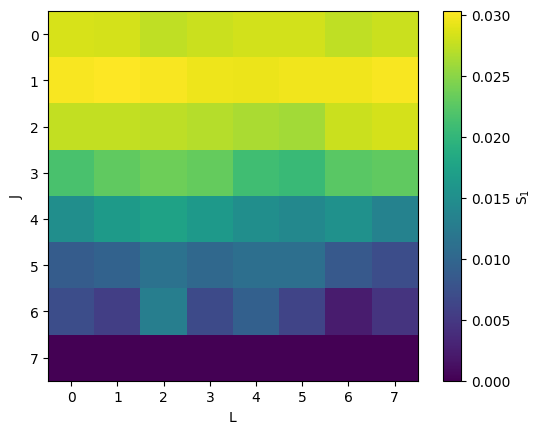

In [12]:
WST_Map(d)